# Estimando o número Pi usando Simulação de Monte Carlo!

*Solução baseada na apresentada em http://drvinceknight.blogspot.com/2013/05/using-monte-carlo-simulation-for.html

In [1]:
from random import random
from math import pi
from matplotlib import pyplot as plt

In [2]:
def gerar_ponto(r):
    return [(.5 - random()) * 2 * r, (.5 - random()) * 2 * r]

def p_esta_no_circulo(p, r):
    return p[0] ** 2 + p[1] ** 2 <= r ** 2

def plt_estimativas(qtd_total, estimativas):
    plt.figure()
    plt.scatter(range(1, qtd_total + 1), estimativas)
    max_x = plt.xlim()[1]
    plt.hlines(pi, 0, max_x, color='black')
    plt.xlim(0, max_x)
    plt.title("Estimativa do $\pi$ em relação ao número de pontos")
    plt.xlabel("Número de pontos")
    plt.ylabel("$\pi$")

def plt_pontos(qtd_total, pontos_no_quadrado, pontos_no_circulo, r):
    qtd_circulo = len(pontos_no_circulo)
    
    plt.figure()
    plt.xlim(-r, r)
    plt.ylim(-r, r)
    plt.scatter([p[0] for p in pontos_no_circulo],  [p[1] for p in pontos_no_circulo],  color='blue',  label="Pontos no círculo")
    plt.scatter([p[0] for p in pontos_no_quadrado], [p[1] for p in pontos_no_quadrado], color='black', label="Pontos no quadrado")
    plt.legend(loc="center")
    plt.title("%s pontos: %s no círculo, estimando $\pi$ como %.4f." % (qtd_total, qtd_circulo, 4 * qtd_circulo / qtd_total))

def simular(qtd_total, r):
    pontos_no_quadrado = []
    pontos_no_circulo  = []
    estimativas_pi     = []
    
    for qtd_quad in range(qtd_total):
        p = gerar_ponto(r)
        
        if p_esta_no_circulo(p, r):
            pontos_no_circulo.append(p)
        else:
            pontos_no_quadrado.append(p)
            
        estimativas_pi.append(4 * len(pontos_no_circulo) / (qtd_quad + 1))

    plt_estimativas(qtd_total, estimativas_pi)
    plt_pontos(qtd_total, pontos_no_quadrado, pontos_no_circulo, r)

In [3]:
qtd_pontos = 30000
raio       = 1

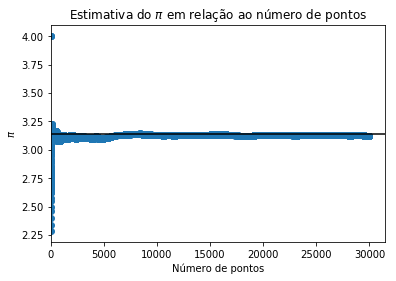

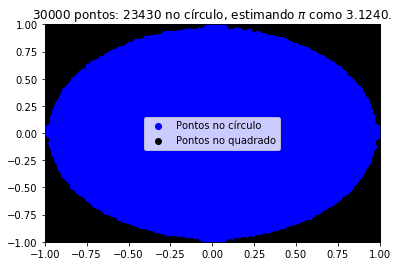

In [4]:
simular(qtd_pontos, raio)